In [2]:
from py2neo import Graph, NodeSelector
from pandas import DataFrame
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import ticker, style, dates

style.use('ggplot')

%matplotlib inline
plt.rcParams["figure.figsize"] = [12,6]

graph = Graph("http://localhost:7474", password = "admin")

In [2]:
data_pocty_unikatnich = DataFrame(graph.data("MATCH (s1:Subjekt)-[sml:PLATCE_SMLOUVA]-() WITH s1, count(sml) AS c WHERE c >= 5 MATCH (s1:Subjekt)-[sml:PLATCE_SMLOUVA]-()-[:PRIJEMCE_SMLOUVA]-(s2:Subjekt) WITH s1, count(distinct(s2)) as cd RETURN s1.ico, cd"))

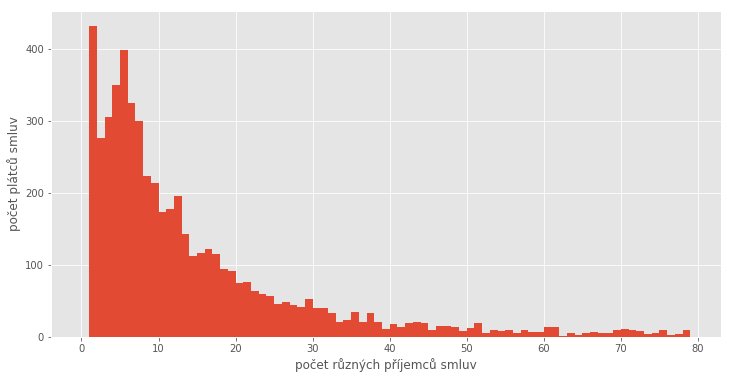

In [18]:
binwidth = 1

fig, axes = plt.subplots()
axes.set_xlabel("počet různých příjemců smluv")
axes.set_ylabel("počet plátců smluv")
axes.hist(data_pocty_unikatnich['cd'], bins=range(0, 80, binwidth), rwidth=1)
fig.savefig("vystup/prijemci-3.pdf", bbox_inches='tight')

In [4]:
# data_pocty_unikatnich.sort_values("cd")

In [5]:
# data_pocty_unikatnich.loc[data_pocty_unikatnich['cd'] == 1]

In [23]:
data2 = DataFrame(graph.data("MATCH (n:Smlouva)-[:PRIJEMCE_SMLOUVA]-(:Subjekt)-[:CRIBIS_AKCIONAR|:CRIBIS_SPOLECNIK|:CRIBIS_SHODA_OSOBY|:CRIBIS_KOMANDISTA|:CRIBIS_KOMPLEMENTAR]-(:Osoba) WHERE n.stari_prijemce >= 0 RETURN 1, n.stari_prijemce / 30 as stari"))

In [24]:
sums = data2.groupby('stari').sum()
sums['stari'] = sums.index

In [39]:
sums_f = sums.loc[sums['stari'] <= 30]

fig, axes = plt.subplots()
axes.set_xlabel("stáří příjemce v době uzavření smlouvy")
axes.set_ylabel("počet smluv")
axes.bar(sums_f['stari'], sums_f['1'])
# fig.savefig("vystup/sidlo-hodnoty.pdf", bbox_inches='tight')

<Container object of 31 artists>

In [22]:
data3 = DataFrame(graph.data("MATCH (n:Smlouva)-[:PRIJEMCE_SMLOUVA]-(:Subjekt)-[:CRIBIS_AKCIONAR|:CRIBIS_SPOLECNIK|:CRIBIS_SHODA_OSOBY|:CRIBIS_KOMANDISTA|:CRIBIS_KOMPLEMENTAR]-(:Osoba) WHERE n.stari_prijemce >= 0 RETURN n.cena_vypoctena, n.stari_prijemce / 30 as stari"))

In [26]:
sums2 = data3.groupby('stari').sum()
sums3 = sums.join(sums2)
sums3['podil'] = sums3['n.cena_vypoctena'] / sums3['1']

<Container object of 31 artists>

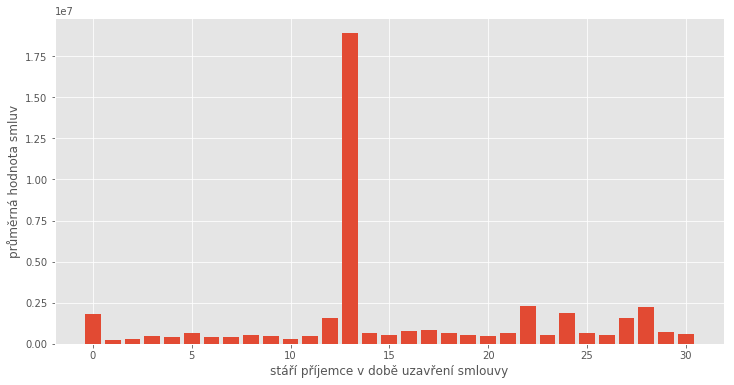

In [27]:
sums_f = sums3.loc[sums3['stari'] <= 30]

fig, axes = plt.subplots()
axes.set_xlabel("stáří příjemce v době uzavření smlouvy")
axes.set_ylabel("průměrná hodnota smluv")
axes.bar(sums_f['stari'], sums_f['podil'])
# fig.savefig("vystup/stari-hodnoty.pdf", bbox_inches='tight')

In [8]:
data4 = DataFrame(graph.data("MATCH (n:Smlouva)-[:PRIJEMCE_SMLOUVA]-(s:Subjekt)-[:CRIBIS_AKCIONAR|:CRIBIS_SPOLECNIK|:CRIBIS_SHODA_OSOBY|:CRIBIS_KOMANDISTA|:CRIBIS_KOMPLEMENTAR]-(:Osoba) WHERE n.stari_prijemce >= 0 WITH s.ico as ico, n.stari_prijemce / 30 as stari, avg(n.cena_vypoctena) as avg RETURN avg, stari"))

In [9]:
sums4 = data4.groupby('stari').skew()
sums4['stari'] = sums4.index

<Container object of 61 artists>

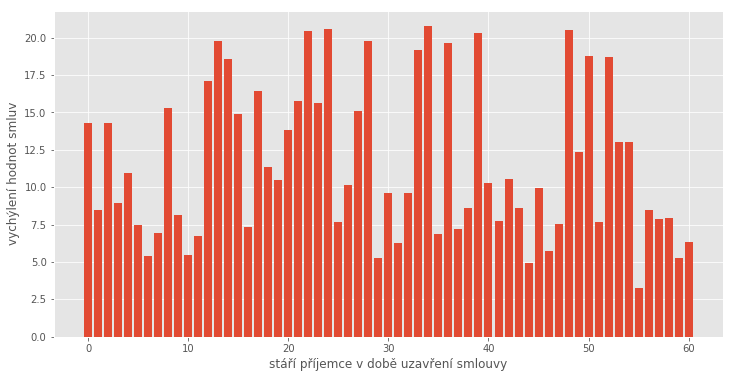

In [10]:
sums_f = sums4.loc[sums4['stari'] <= 60]

fig, axes = plt.subplots()
axes.set_xlabel("stáří příjemce v době uzavření smlouvy")
axes.set_ylabel("vychýlení hodnot smluv")
axes.bar(sums_f['stari'], sums_f['avg'])
# fig.savefig("vystup/stari-hodnoty.pdf", bbox_inches='tight')

In [2]:
data5 = DataFrame(graph.data("MATCH (n:Smlouva)-[:PRIJEMCE_SMLOUVA]-(s:Subjekt)-[:CRIBIS_AKCIONAR|:CRIBIS_SPOLECNIK|:CRIBIS_SHODA_OSOBY|:CRIBIS_KOMANDISTA|:CRIBIS_KOMPLEMENTAR]-(:Osoba) WHERE n.stari_prijemce >= 0 WITH s.ico as ico, n.stari_prijemce / 30 as stari, avg(n.cena_vypoctena) as avg WITH stari, avg(avg) as avg2 ORDER BY stari RETURN stari, avg2"))

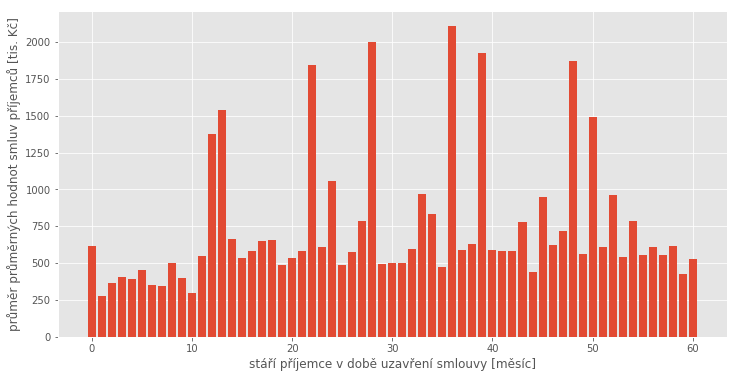

In [7]:
data5_f = data5.loc[data5['stari'] <= 60].copy()
data5_f['avg2'] =  data5_f['avg2'] / 1000

fig, axes = plt.subplots()
axes.set_xlabel("stáří příjemce v době uzavření smlouvy [měsíc]")
axes.set_ylabel("průměr průměrných hodnot smluv příjemců [tis. Kč]")
axes.bar(data5_f['stari'], data5_f['avg2'])
fig.savefig("vystup/stari-hodnoty-prumer.pdf", bbox_inches='tight')

In [4]:
data6 = DataFrame(graph.data("MATCH (n:Smlouva)-[:PRIJEMCE_SMLOUVA]-(s:Subjekt)-[:CRIBIS_AKCIONAR|:CRIBIS_SPOLECNIK|:CRIBIS_SHODA_OSOBY|:CRIBIS_KOMANDISTA|:CRIBIS_KOMPLEMENTAR]-(:Osoba) WHERE n.stari_prijemce >= 0 WITH s.ico as ico, n.stari_prijemce / 30 as stari, avg(n.cena_vypoctena) as avg WITH stari, percentileDisc(avg,0.5) as avg2 ORDER BY stari RETURN stari, avg2"))

In [8]:
data6_f = data6.loc[data6['stari'] <= 60].copy()
data6_f['avg2'] =  data6_f['avg2'] / 1000

fig, axes = plt.subplots()
axes.set_xlabel("stáří příjemce v době uzavření smlouvy [měsíc]")
axes.set_ylabel("medián průměrných hodnot smluv příjemců [tis. Kč]")
axes.bar(data6_f['stari'], data6_f['avg2'])
fig.savefig("vystup/stari-hodnoty-median.pdf", bbox_inches='tight')